In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [8]:
X,y = mglearn.datasets.make_wave(n_samples=60) # make sample data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X_train.shape # y=w1x1과 같음 # x값이 45행 1열

(45, 1)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train) # 훈련을 통해 weight 찾기

LinearRegression()

In [12]:
lr.coef_, lr.intercept_  # w값(가중치값), 절편 # y = lr.coef_*x1 + lr.intercept_ # _ = 학습을 통해 만들어진 값

(array([0.44842545]), -0.0701871909360514)

In [54]:
# print(X_train[0])
print(X_train[0] * lr.coef_ + lr.intercept_, y_train[0]) # 예측값, 실제값
print(lr.predict(X_train[:2])[0], y_train[0]) # 예측값, 실제값

[-35.19417586 -34.7075221  -41.64138291 -34.7075221  -27.32847797
   6.8594321   -2.54595963 -34.28735465 -34.4340217  -33.76768378
 -27.83387467   3.68902796 -34.7875355  -34.70751005 -34.7075221
 -34.60820925 -34.7075221  -34.72324947 -34.64986095 -34.69527948
 -34.69357133 -34.64524693 -34.72737184 -34.4261864  -34.73031891
 -34.69844194 -34.7075221  -34.7075221  -34.7075221  -34.7075221
 -34.7075221  -34.7075221  -34.7075221  -34.7075221  -34.7075221
 -34.7075221  -34.7075221  -34.7075221  -34.51027116 -34.7075221
 -34.60997556 -32.19137383 -34.26585083 -34.29795881 -34.78072515
 -34.70819451 -34.85703885 -32.25792875 -34.80072808 -34.7075221
 -34.7075221  -34.7075221  -34.7075221  -34.7075221  -34.7075221
 -34.7075221  -34.7075221  -34.7075221  -34.7075221  -35.82319115
 -36.40510963 -35.29269647 -32.63806199 -35.03266343 -34.55940154
 -41.8936001  -37.12238344 -34.32971123 -18.94337537 -60.78403486
 -36.86506737 -35.95833564 -35.1063997  -42.88705634 -42.33837957
 -34.74371848 -3

In [55]:
lr.score(X_train, y_train), lr.score(X_test, y_test) # 훈련 데이터의 score, 테스트 데이터의 score -> 오차가 많은 상태

(0.9448313975211591, 0.7758378393351623)

In [ ]:
#Linear Regression

In [56]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X.shape # x가 104개 -> w도 104개여야 한다.

(506, 104)

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
lr.coef_.shape # 가중치 104개

(104,)

In [59]:
lr.score(X_train, y_train), lr.score(X_test, y_test) # 완성도에 차이 -> 1이 최적이므로 트레인 성능 많이 높아짐. test는 낮음 -> 과대적합. # 어떻게 하면 줄일 수 있는지 생각 -> 수식은 테스트로

(0.9448313975211591, 0.7758378393351623)

In [147]:
#Ridge
rlr = Ridge(alpha=0.1)
rlr.fit(X_train, y_train)
rlr.score(X_train, y_train), rlr.score(X_test, y_test)

(0.5114002512219655, 0.49182837290627046)

In [99]:
(rlr.coef_ != 0).sum()

104

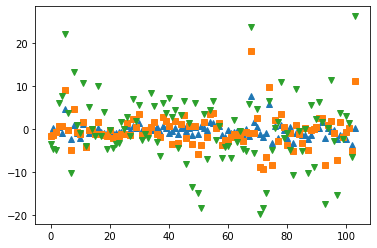

In [88]:
rlr10 = Ridge(alpha=10)  # 값 크면 민감도 커짐 -> 테스트 데이터 설명력 낮아지므로 w값 튀지 않게 조절기(alpha)로 줄여줘야 한다.
rlr10.fit(X_train, y_train)


rlr1 = Ridge() 
rlr1.fit(X_train, y_train)


rlr01 = Ridge(alpha=0.1)
rlr01.fit(X_train, y_train)

plt.plot(rlr10.coef_, '^') # w의 범위가 넓음
plt.plot(rlr1.coef_, 's')
plt.plot(rlr01.coef_, 'v') # 파란색, w가 좁혀지니 y의 민감도 떨어짐.

plt.show()

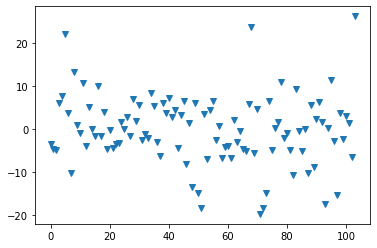

In [89]:
plt.plot(rlr01.coef_, 'v')

In [91]:
#라쏘
llr = Lasso(alpha=0.001, max_iter=100000) # 1일 경우 과소적합 # 반복회수
llr.fit(X_train, y_train)
llr.score(X_train, y_train), llr.score(X_test, y_test)

(0.9327758606898219, 0.8180643704626334)

In [96]:
(llr.coef_ != 0).sum() # 0이 아닌 것이 73개
# llr.coef_.shape

73

In [209]:
# !pip install statsmodels # 통계 분석 패키지

In [213]:
import numpy as np
import pandas as pd # 엑셀과 같은 표를 나타내는 시각화 도구
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # 통계 분석 패키지

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [101]:
# load diabetes 함수를 이용해서 당뇨병 데이터 준비
# 선형 회귀 알고리즘을 사용해서 최적 모델을 만드세요

In [168]:

diabetes = load_diabetes()
X = diabetes['data']
y = diabetes['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [159]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [160]:
lr.coef_, lr.intercept_

(array([  47.74657117, -241.99180361,  531.96856896,  381.56529922,
        -918.49020552,  508.25147385,  116.94040498,  269.48508571,
         695.8062205 ,   26.32343144]),
 151.66516982689936)

In [161]:
print(X_train[0] * lr.coef_ + lr.intercept_, y_train[0])
print(lr.predict(X_train[:2])[0], y_train[0])

[151.40186874 162.46807996 174.16509388 170.5203414  129.09405881
 139.53800165 160.36688827 141.02229216 188.04191889 152.4000424 ] 166.0
204.0320577068288 166.0


In [162]:
lr.score(X_train, y_train), lr.score(X_test, y_test) # 과소적합 상태
lr.coef_.shape # 가중치 10개

(10,)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [164]:
rlr=Ridge(alpha=0.01)
rlr.fit(X_train, y_train)
rlr.score(X_train, y_train), rlr.score(X_test, y_test)

(0.5172943115585344, 0.4870604290667029)

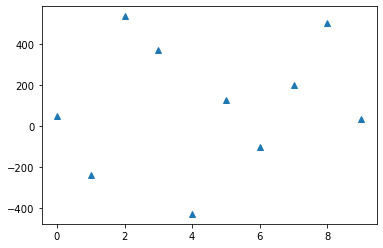

In [165]:
plt.plot(rlr.coef_, '^')

In [166]:
#라쏘
llr=Lasso(alpha=0.01)
llr.fit(X_train, y_train)
llr.score(X_train, y_train), llr.score(X_test, y_test)

(0.517666513166295, 0.48803832998064045)

In [169]:
# 선생님
diabetes = load_diabetes()
X = diabetes['data']
y = diabetes['target']

In [171]:
diabetes.keys()
diabetes.target[:5] # target은 연속형 값 (회귀 모델에 적용)

array([151.,  75., 141., 206., 135.])

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [174]:
lr =LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.5190348343200994, 0.48490866359058005)

In [179]:
rlr = Ridge(alpha=0.1) # default는 1 # 크게 움직임 x -> 데이터에 문제 
rlr.fit(X_train, y_train)
rlr.score(X_train, y_train), rlr.score(X_test, y_test)

(0.5114002512219655, 0.49182837290627046)

In [198]:
llr = Lasso(alpha=0.01) # default는 1 # 크게 움직임 x -> 데이터에 문제 
llr.fit(X_train, y_train)
llr.score(X_train, y_train), llr.score(X_test, y_test)

(0.517666513166295, 0.48803832998064045)

In [199]:
llr.coef_.shape, (llr.coef_ != 0).sum() # 0.1일때 전체 속성 다 사용 

((10,), 10)

In [202]:
diabetes_df = pd.DataFrame(X, columns=diabetes['feature_names'])
diabetes_df['target'] = diabetes['target']
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


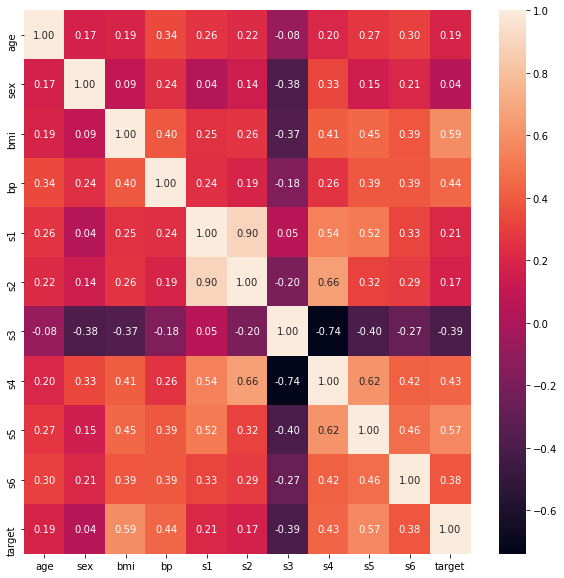

In [208]:
# diabetes_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_df.corr(), cbar=True, annot=True, fmt='.2f', xticklabels=diabetes_df.columns)
plt.show()

In [217]:
xt = sm.add_constant(X_train)
model = sm.OLS(y_train, xt) # 선형회귀 모델 만들기
model2 = model.fit()

In [219]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     34.53
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           2.97e-45
Time:                        15:29:17   Log-Likelihood:                -1789.5
No. Observations:                 331   AIC:                             3601.
Df Residuals:                     320   BIC:                             3643.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.6652      3.023     50.162      0.0